## Visualización de datos

In [ ]:
import pandas as pd
import plotly as plt 
import seaborn as sns
import altair as alt 

import plotly.express as px 

In [ ]:
# Llamamos el set de datos público 
zoo_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data'

# los nombres de las columnas se encuentran en :  'https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.names'
zoo_name= ['animal name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic',' cat-size','type']

In [ ]:
data = pd.read_csv(zoo_data)
data.columns = zoo_name

In [ ]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,cat-size,type
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


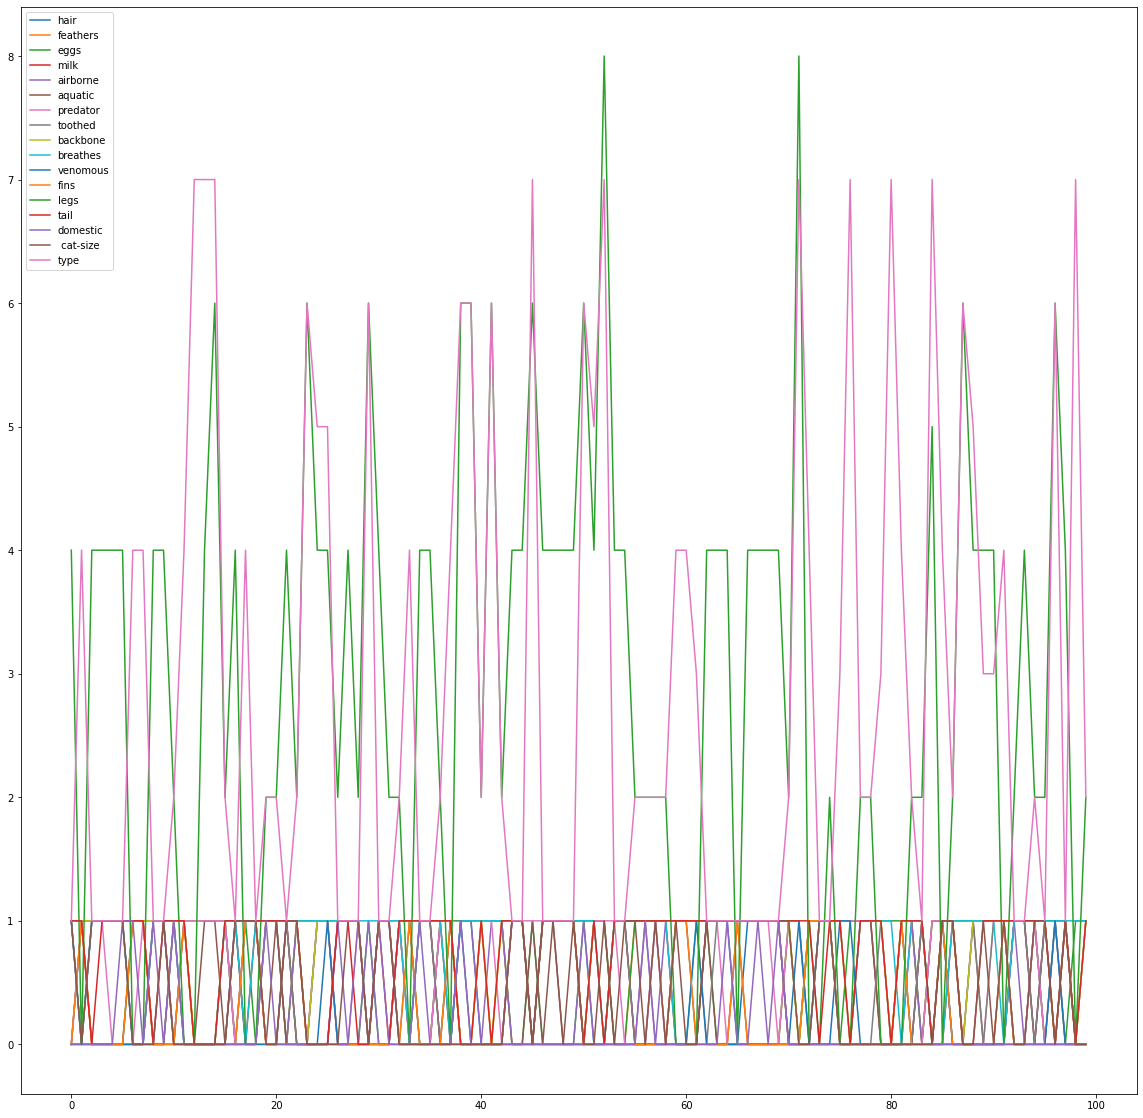

In [ ]:
data.plot(figsize=(20,20));

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  100 non-null    object
 1   hair         100 non-null    int64 
 2   feathers     100 non-null    int64 
 3   eggs         100 non-null    int64 
 4   milk         100 non-null    int64 
 5   airborne     100 non-null    int64 
 6   aquatic      100 non-null    int64 
 7   predator     100 non-null    int64 
 8   toothed      100 non-null    int64 
 9   backbone     100 non-null    int64 
 10  breathes     100 non-null    int64 
 11  venomous     100 non-null    int64 
 12  fins         100 non-null    int64 
 13  legs         100 non-null    int64 
 14  tail         100 non-null    int64 
 15  domestic     100 non-null    int64 
 16   cat-size    100 non-null    int64 
 17  type         100 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.2+ KB


In [ ]:
plot_legs = alt.Chart(data).mark_line().encode(
    x='animal name',
    y='legs'
)

In [ ]:
plot_legs.title = 'Cantidad de patas'
plot_legs

alt.Chart(...)

In [ ]:
alt.Chart(data).mark_bar().encode(
    x='animal name',
    y='legs'
)

alt.Chart(...)

In [ ]:
# Gráfica de pie 
fig = px.pie(data, values='aquatic', names='animal name', title='Porcentaje de animales acuáticos') 
fig.show() 

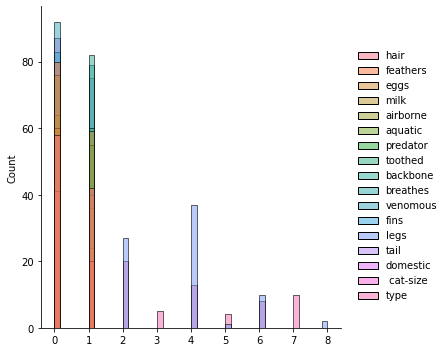

In [ ]:
# Gráfica de barras 
sns.displot(data); 

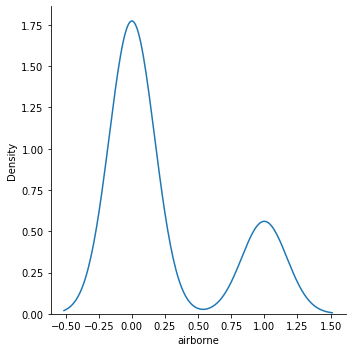

In [ ]:
# Distribuciones 
sns.displot(data, x="airborne", kind="kde") ;

Para mayor infomacion de las librerias 

*  Altait = [Enlace](https://altair-viz.github.io/gallery/index.html#)
*   plotly = [Enlace](https://plotly.com/)
*   seaborn = [Enlace](https://seaborn.pydata.org/index.html)

## Transformación de datos

In [ ]:
#Llamamos el set de datos público 
Chicago_data = 'https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/Traffic_Crashes1.csv'

token_map_plot='pk.eyJ1IjoiY2hlbWlza3kiLCJhIjoiY2tnOGNhcXk3MGZ3eDJ5b2FxZ3ViajN1MyJ9.t3R24lWTwzTQwyJw4vuWFw'

In [ ]:
data_chicago = pd.read_csv(Chicago_data)

In [ ]:
data_chicago.head()

,Unnamed: 0,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,date_real
0,290702,9e97e92753166de921a0e87199513aa841142c6fbb3a1e...,JA154528,NaN,2017-02-14 10:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,$500 OR LESS,02/15/2017 11:22:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1417,W,ALBION AVE,2432.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,3,2,42.001676,-87.666364,POINT (-87.666364005301 42.001675862416),2017-02-14
1,405524,e5fe82ab7757d630a7f79927113bc63b5bede0cda74665...,JC391213,NaN,2019-08-13 19:12:00,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,$500 OR LESS,08/13/2019 07:13:00 PM,IMPROPER OVERTAKING/PASSING,NOT APPLICABLE,3202,N,CLARK ST,1924.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,8.0,0.0,19,3,8,41.940041,-87.650923,POINT (-87.650923222567 41.940040917032),2019-08-13
2,261834,8c8ea6db9e1950765419429e2732ba5598fc6f87ac9e0c...,JC273287,NaN,2019-05-22 08:30:00,25,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,REAR TO FRONT,ONE-WAY,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,$500 OR LESS,05/22/2019 08:45:00 AM,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",NOT APPLICABLE,3300,W,BELLE PLAINE AVE,1724.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8,4,5,41.955854,-87.710645,POINT (-87.710644534923 41.955853610383),2019-05-22
3,38519,02671b7d36a9d189d607778816fec23bbb2e5ac3cd3039...,JA307115,NaN,2017-06-14 16:50:00,0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,REAR END,PARKING LOT,1.0,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,NaN,Y,NaN,"$501 - $1,500",06/14/2017 06:39:00 PM,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,1340,S,DAMEN AVE,1233.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,16,4,6,41.863734,-87.676313,POINT (-87.676312689993 41.863734390899),2017-06-14
4,420197,ef1b1d450f65c6d16245dffdd3304d93b8be7d7bbf47f3...,JB247942,NaN,2018-05-03 08:35:00,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",05/03/2018 09:15:00 AM,IMPROPER OVERTAKING/PASSING,UNABLE TO DETERMINE,2755,W,CERMAK RD,1034.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8,5,5,41.851794,-87.695223,POINT (-87.695223114296 41.851794251516),2018-05-03


In [ ]:
data_chicago['CRASH_DATE'] = data_chicago['CRASH_DATE'].apply(lambda x: pd.to_datetime(x,
errors='coerce', utc=True))

In [ ]:
data_chicago.sample(3)

,Unnamed: 0,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,date_real
17687,22142,a68d71be2166c17fee663851dcfa51610e96a4a9ed0539...,NaN,NaN,2020-10-12 05:52:00+00:00,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,"OVER $1,500",10/12/2020 06:13:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,2317,S,KOSTNER AVE,1013.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,2,10,41.848966,-87.73428,POINT (-87.734280276159 41.848966303121),2020-10-12
12189,228429,77a4a6c5cdf65808ff8bba2acc5eb8a92648c888d9c66a...,JC176745,NaN,2019-03-07 12:30:00+00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),2.0,STRAIGHT AND LEVEL,DRY,UNKNOWN,NaN,NO INJURY / DRIVE AWAY,Y,NaN,NaN,"OVER $1,500",03/07/2019 12:50:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,1232,W,LAWRENCE AVE,2033.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12,5,3,41.969115,-87.66098,POINT (-87.6609799919 41.969115368512),2019-03-07
19012,261606,8c6769a3a6871818fde59fffe8004dbab7ee68e128d9c3...,JA568502,Y,2017-12-30 23:10:00+00:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,SNOW OR SLUSH,UNKNOWN,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",12/30/2017 11:15:00 PM,WEATHER,DISREGARDING TRAFFIC SIGNALS,5600,W,WASHINGTON BLVD,1512.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,23,7,12,41.882353,-87.76501,POINT (-87.765010275085 41.882353135739),2017-12-30


In [ ]:
data_chicago['NUM_UNITS'].astype('int32')

0        2
1        2
2        2
3        2
4        2
        ..
27956    1
27957    2
27958    2
27959    2
27960    2
Name: NUM_UNITS, Length: 27961, dtype: int32

In [ ]:
px.set_mapbox_access_token(token_map_plot)

In [ ]:
df = px.data.carshare()
fig = px.scatter_mapbox(data_chicago, lat="LATITUDE", lon="LONGITUDE", color="CRASH_HOUR", size="NUM_UNITS",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

In [ ]:
data_chicago['Lat_round'] = round(data_chicago['LATITUDE'],2)
data_chicago['Long_round'] = round(data_chicago['LONGITUDE'],2)

In [ ]:
df = px.data.carshare()
fig = px.scatter_mapbox(data_chicago, lat="Lat_round", lon="Long_round", color="CRASH_HOUR", size="NUM_UNITS",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

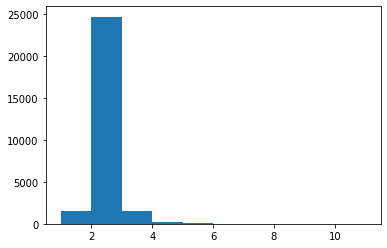

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data_chicago["NUM_UNITS"]);

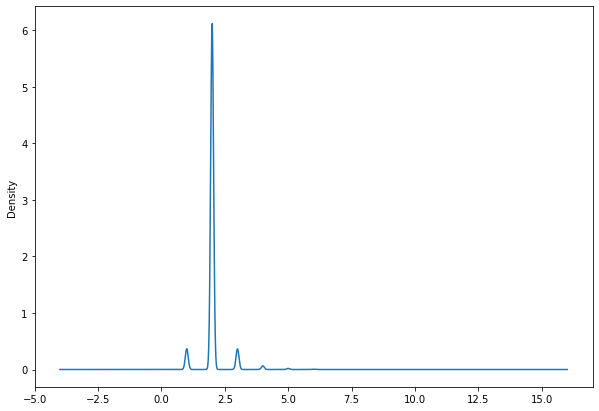

In [ ]:
data_chicago['NUM_UNITS'].plot(kind = "kde", figsize=(10,7));

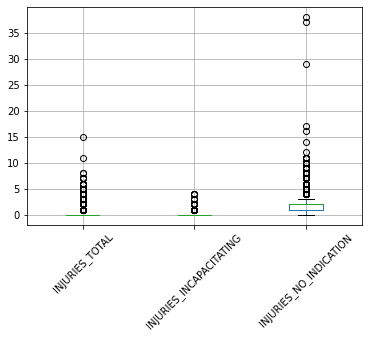

In [ ]:
data_chicago.boxplot(column=['INJURIES_TOTAL', 'INJURIES_INCAPACITATING', 'INJURIES_NO_INDICATION'], rot=45);

In [ ]:
data_chicago['INJURIES_NO_INDICATION'].describe()

count    27910.000000
mean         2.021426
std          1.164637
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         38.000000
Name: INJURIES_NO_INDICATION, dtype: float64

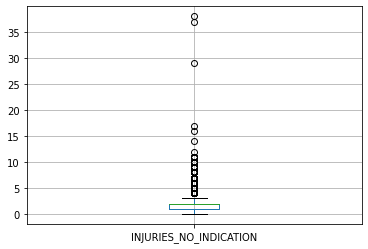

In [ ]:
data_chicago.boxplot(column=['INJURIES_NO_INDICATION']);

In [ ]:
import scipy.stats as ss
print(ss.variation(data_chicago["NUM_UNITS"]))
print(ss.mode(data_chicago["NUM_UNITS"])[0])

0.21794501057510543
[2]


In [ ]:
tab = pd.crosstab(index=data_chicago["CRASH_MONTH"],columns="frecuencia")
tab

col_0,frecuencia
CRASH_MONTH,
1,2255
2,2072
3,2097
4,1980
5,2256
6,2366
7,2524
8,2607
9,2700


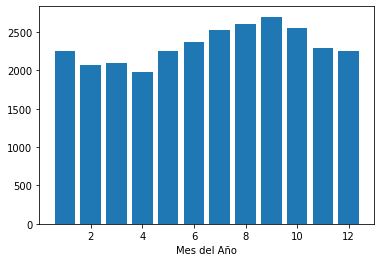

In [ ]:
plt.bar(tab.index,tab["frecuencia"])
plt.xlabel("Mes del Año")
plt.savefig("accidentes.png")

## Agrupamiento de dataset

In [ ]:
data_chicago.groupby(['LIGHTING_CONDITION','REPORT_TYPE','CRASH_HOUR']).agg({'BEAT_OF_OCCURRENCE':'sum',})

BEAT_OF_OCCURRENCE
LIGHTING_CONDITION REPORT_TYPE                CRASH_HOUR                    
DARKNESS           AMENDED                    20                      1614.0
                   NOT ON SCENE (DESK REPORT) 0                      64739.0
                                              1                      60086.0
                                              2                      36251.0
                                              3                      39172.0
...                                                                      ...
UNKNOWN            ON SCENE                   19                      4735.0
                                              20                      8113.0
                                              21                      6122.0
                                              22                      9699.0
                                              23                      3176.0

[291 rows x 1 columns]

In [ ]:
light_condition_per=data_chicago.groupby(['LIGHTING_CONDITION','REPORT_TYPE','CRASH_HOUR']).agg({'BEAT_OF_OCCURRENCE':'sum',})

In [ ]:
light_condition_per=light_condition_per.reset_index()
light_condition_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               291 non-null    int64  
 1   LIGHTING_CONDITION  291 non-null    object 
 2   REPORT_TYPE         291 non-null    object 
 3   CRASH_HOUR          291 non-null    int64  
 4   BEAT_OF_OCCURRENCE  291 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 11.5+ KB


In [ ]:
data_chicago.groupby(['LIGHTING_CONDITION','REPORT_TYPE']).agg({'CRASH_HOUR':['mean','min','max']})

CRASH_HOUR        
                                                        mean min max
LIGHTING_CONDITION     REPORT_TYPE                                  
DARKNESS               AMENDED                     20.000000  20  20
                       NOT ON SCENE (DESK REPORT)  15.395450   0  23
                       ON SCENE                    13.735294   0  23
DARKNESS, LIGHTED ROAD AMENDED                     22.000000  21  23
                       NOT ON SCENE (DESK REPORT)  15.688938   0  23
                       ON SCENE                    12.978808   0  23
DAWN                   NOT ON SCENE (DESK REPORT)  11.816733   0  22
                       ON SCENE                     9.266968   0  23
DAYLIGHT               AMENDED                     11.923077   6  20
                       NOT ON SCENE (DESK REPORT)  12.749100   0  23
                       ON SCENE                    12.275000   0  22
DUSK                   AMENDED                     20.000000  20  20
                       NOT ON SCENE (DESK REPORT)  16.787321   0  23
                       ON SCENE                    16.905775   0  23
UNKNOWN                NOT ON SCENE (DESK REPORT)  12.798440   0  23
                       ON SCENE                    10.393782   0  23

In [ ]:
crash_hours_reporte=data_chicago.groupby(['LIGHTING_CONDITION','REPORT_TYPE']).agg({'CRASH_HOUR':['mean','min','max'],'CRASH_RECORD_ID':'count'})
crash_hours_reporte=crash_hours_reporte.reset_index()
new_column_names=['LIGHTING_CONDITION','REPORT_TYPE','CRASH_HOUR_mean','CRASH_HOUR_min','CRASH_HOUR_max','count_id']
crash_hours_reporte.columns = new_column_names

In [ ]:
alt.Chart(crash_hours_reporte).mark_bar().encode(
    x='LIGHTING_CONDITION',
    y='count_id',
    color='REPORT_TYPE'
).properties(width=220)

alt.Chart(...)